# **Project 1 Python Module -  15 Puzzle Game:** 
***Introduction:***

The 15-puzzle is a sliding puzzle that consists of a frame of numbered square tiles in random order with one tile missing. The object of the puzzle is to place the tiles in order by making sliding moves that use the empty space.




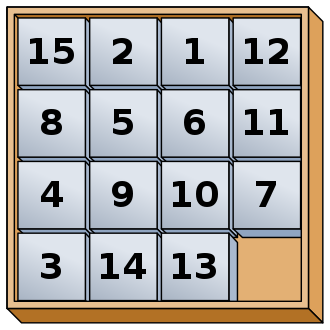

In [5]:
Image('15 puzzle wikipedia.png')

***Overview of The Project:***

The project includes:

*   Creating the Game - building the Board, creating the moves, counting the steps.
*   GUI - package that display and interactes with the user on the screen

*   Shuffiling the Board and validating that the board is solvable.

***The GUI - The Package GAME2DBOARD***

The package includes Class Board, which have - 

Properties like:

size, nrows, ncols, width, height, title, 

Event Properties like:

on_mouse_click - gets or sets the mouse callback function

Methods like:

show(), clear(), shuffle(), create_output(), print()

In [2]:
!pip install game2dboard

**Note**: the Package does not work with google colab, but runs on IDEs in local host. 

***The*** ***Game*** - 
***Class*** ***Puzzle***:


*   Initialization of the Board, the tiles, the empty tile and the counter of the moves

*   The conection to GUI - the class is initialized using the class Board from game2dboard.


*   Defining the function of the movement (in regard to the empty tile).


In [ ]:
from game2dboard import Board
class Puzzle:
    def __init__(self):
        self.tiles = Board(4, 4) #setting the puzzle to board using class Board
        self.empty_tile = [] #place the empty tile row and column
        #initialization of the numbers in the tiles of the puzzle
        for i in range(0, 4):
            for j in range(0, 4):
                self.tiles[i][j] = str(i*4 + j+1)
        # initialization of the empty tile
        self.tiles[3][3] = " "
        self.move_counter = 0
    def is_empty(self):
        # finding the empty tile after shuffling
        for i in range(0, 4):
            for j in range(0, 4):
                if self.tiles[i][j] == " ":
                    self.empty_tile = [i, j]
    
    def to_where(self, btn, row, col):
        #return the function to where to move + mouse callback
        if [row-1, col] == self.empty_tile:
          self.move_up(row, col)
        if [row+1, col] == self.empty_tile:
          self.move_down(row, col)
        if [row, col-1] == self.empty_tile:
          self.move_left(row, col)
        if [row, col+1] == self.empty_tile:
          self.move_right(row, col)
        self.game_over()
    def move_up(self, row, col):
        #getting the input to move up, and replacing the position up
        self.empty_tile = [row, col]
        self.tiles[row-1][col] = self.tiles[row][col]
        self.tiles[row][col] = " "
        self.move_counter += 1
        self.tiles.print(f"Counter = {self.move_counter}")
    def move_down(self, row, col):
        #getting the input to move_down, and replacing the position down
        self.empty_tile = [row, col]
        self.tiles[row+1][col] = self.tiles[row][col]
        self.tiles[row][col] = " "
        self.move_counter += 1
        self.tiles.print(f"Counter = {self.move_counter}")
    def move_left(self, row, col):
        # getting the input to move_left, and replacing the position left
        self.empty_tile = [row, col]
        self.tiles[row][col-1] = self.tiles[row][col]
        self.tiles[row][col] = " "
        self.move_counter += 1
        self.tiles.print(f"Counter = {self.move_counter}")
    def move_right(self, row, col):
        # getting the input to move_right, and replacing the position right
        self.empty_tile = [row, col]
        self.tiles[row][col+1] = self.tiles[row][col]
        self.tiles[row][col] = " "
        self.move_counter += 1
        self.tiles.print(f"Counter = {self.move_counter}")

    

***def to_where:***


*   Defined as the callback function of the mouse click
*   p.tiles.on_mouse_click = p.to_where


***Checking*** ***Game*** ***over***:


*   Checking the right order of the board and printing message


In [ ]:
    def game_over(self):
        #checking if the board is in the right order
        stop = False
        i = 0
        while not stop and i < 4:
            j = 0
            while not stop and j < 4:
                if [i, j] != [3, 3]:
                    if self.tiles[i][j] != str(i * 4 + j + 1):
                        stop = True
                elif self.empty_tile == [3, 3]:
                    self.tiles.print(f"Game Over, Total number of moves = {self.move_counter}")
                j += 1
            i += 1

***Shuffling*** ***and*** ***Validation***:


*   The Class Board has a shuffling method for randomizing the numbers on the tiles.
*   BUT - there are cases which can not be solved!!
so... using this site: https://www.geeksforgeeks.org/check-instance-15-puzzle-solvable/
 you can find out how to validate that the shuffling order is solvable.
*   Than - implamenting this limits in the class:

In [ ]:
    def is_valid(self):
        #check if the shuffle is solvable
        #need to check the inversion count (odd or even) and the position of the empty tile (odd or even)
        if_valid = False
        while not if_valid:
            list_tiles = []
            for i in range(0, 4):
                for j in range(0, 4):
                    if self.tiles[i][j] != " ":
                        list_tiles.append(int(self.tiles[i][j]))
            count = 0
            for index in range(0, len(list_tiles)):
                num = list_tiles[index]
                for next_num in list_tiles[index+1:]:
                    if num > next_num:
                        count += 1
            if count % 2 == 0:
                if self.empty_tile[0] == 0 or self.empty_tile[0] == 2:
                    p.tiles.shuffle()
                    p.is_empty()
                else:
                    if_valid = True
            elif count % 2 != 0:
                if self.empty_tile[0] == 1 or self.empty_tile[0] == 3:
                    p.tiles.shuffle()
                    p.is_empty()
                else:
                    if_valid = True

# **AND ALL TOGETHER:**




In [ ]:
from game2dboard import Board
class Puzzle:
    def __init__(self):
        self.tiles = Board(4, 4) #setting the puzzle to board using class Board
        self.empty_tile = [] #place the empty tile row and column
        #initialization of the numbers in the tiles of the puzzle
        for i in range(0, 4):
            for j in range(0, 4):
                self.tiles[i][j] = str(i*4 + j+1)
        # initialization of the empty tile
        self.tiles[3][3] = " "
        self.move_counter = 0
    def is_empty(self):
        # finding the empty tile after shuffling
        for i in range(0, 4):
            for j in range(0, 4):
                if self.tiles[i][j] == " ":
                    self.empty_tile = [i, j]
    def is_valid(self):
        #check if the shuffle is solvable
        #need to check the inversion count (odd or even) and the position of the empty tile (odd or even)
        if_valid = False
        while not if_valid:
            list_tiles = []
            for i in range(0, 4):
                for j in range(0, 4):
                    if self.tiles[i][j] != " ":
                        list_tiles.append(int(self.tiles[i][j]))
            count = 0
            for index in range(0, len(list_tiles)):
                num = list_tiles[index]
                for next_num in list_tiles[index+1:]:
                    if num > next_num:
                        count += 1
            if count % 2 == 0:
                if self.empty_tile[0] == 0 or self.empty_tile[0] == 2:
                    p.tiles.shuffle()
                    p.is_empty()
                else:
                    if_valid = True
            elif count % 2 != 0:
                if self.empty_tile[0] == 1 or self.empty_tile[0] == 3:
                    p.tiles.shuffle()
                    p.is_empty()
                else:
                    if_valid = True
    def to_where(self, btn, row, col):
        #return the function to where to move + mouse callback
        if [row-1, col] == self.empty_tile:
            self.move_up(row, col)
        if [row+1, col] == self.empty_tile:
            self.move_down(row, col)
        if [row, col-1] == self.empty_tile:
            self.move_left(row, col)
        if [row, col+1] == self.empty_tile:
            self.move_right(row, col)
        self.game_over()
    def move_up(self, row, col):
        #getting the input to move up, and replacing the position up
        self.empty_tile = [row, col]
        self.tiles[row-1][col] = self.tiles[row][col]
        self.tiles[row][col] = " "
        self.move_counter += 1
        self.tiles.print(f"Counter = {self.move_counter}")
    def move_down(self, row, col):
        #getting the input to move_down, and replacing the position down
        self.empty_tile = [row, col]
        self.tiles[row+1][col] = self.tiles[row][col]
        self.tiles[row][col] = " "
        self.move_counter += 1
        self.tiles.print(f"Counter = {self.move_counter}")
    def move_left(self, row, col):
        # getting the input to move_left, and replacing the position left
        self.empty_tile = [row, col]
        self.tiles[row][col-1] = self.tiles[row][col]
        self.tiles[row][col] = " "
        self.move_counter += 1
        self.tiles.print(f"Counter = {self.move_counter}")
    def move_right(self, row, col):
        # getting the input to move_right, and replacing the position right
        self.empty_tile = [row, col]
        self.tiles[row][col+1] = self.tiles[row][col]
        self.tiles[row][col] = " "
        self.move_counter += 1
        self.tiles.print(f"Counter = {self.move_counter}")
    def game_over(self):
        #checking if the board is in the right order
        stop = False
        i = 0
        while not stop and i < 4:
            j = 0
            while not stop and j < 4:
                if [i, j] != [3, 3]:
                    if self.tiles[i][j] != str(i * 4 + j + 1):
                        stop = True
                elif self.empty_tile == [3, 3]:
                    self.tiles.print(f"Game Over, Total number of moves = {self.move_counter}")
                j += 1
            i += 1


p= Puzzle()
p.tiles.title = "15 Puzzle - Click me to Move!"
p.tiles.cell_size = 120
p.tiles.cell_color = "bisque"
p.tiles.shuffle()
p.is_empty()
p.is_valid()
p.tiles.create_output(color="Blue", background="White", font_size=20)
p.tiles.on_mouse_click = p.to_where
p.tiles.show()

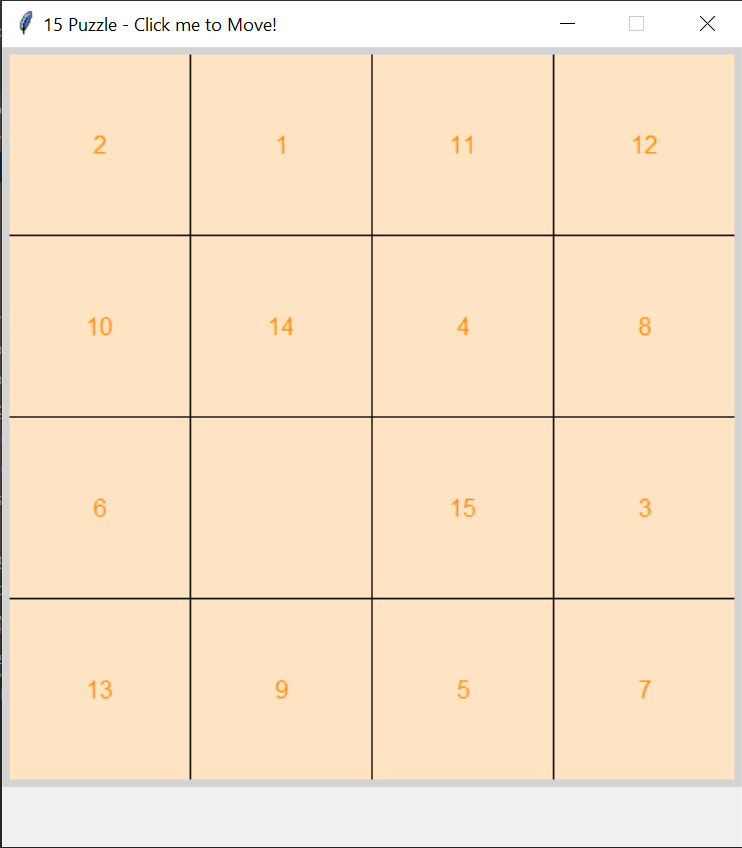

In [13]:
Image('game board start.PNG', width=400)

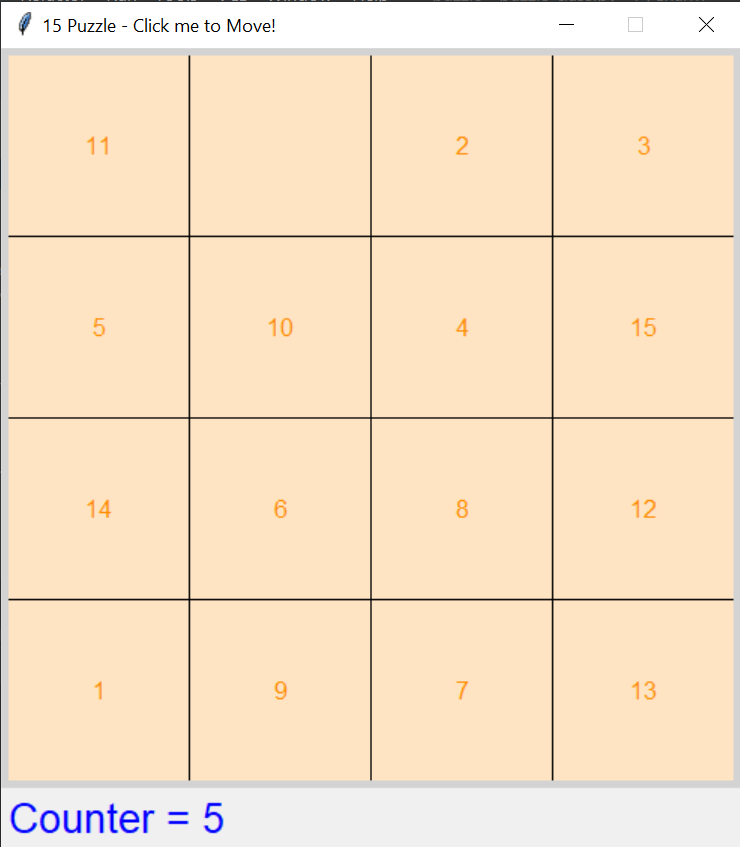

In [16]:
Image('game board with counter.PNG', width=400)

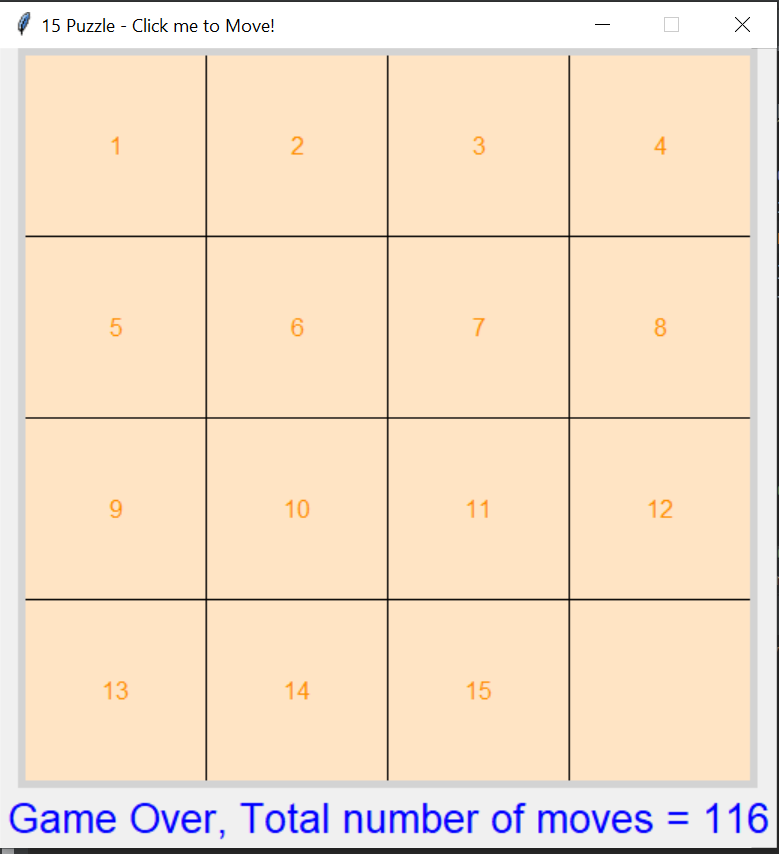

In [14]:
Image('game board gameover.PNG', width=400)

In [2]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()